# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
- Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
- Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

- W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [66]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [67]:
def show(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

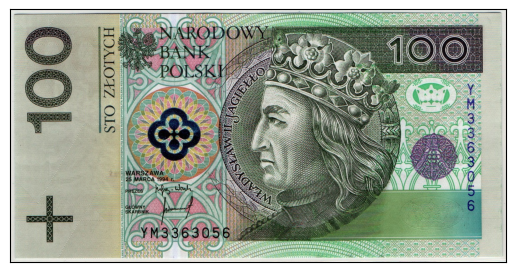

In [68]:
img_100 = cv2.imread("100zloty.jpg")
show(img_100)

In [69]:
def eight_diff_bitmaps(img):
    fig, axs = plt.subplots(1, 8, figsize=(20, 20))
    images = []
    for i in range(8):
        images.append((img & 2 ** i))
        axs[i].imshow(images[i].astype('bool').astype('uint8') * 255, cmap='gray')
        axs[i].set_xticks([]), axs[i].set_yticks([])
    plt.show()
    return images


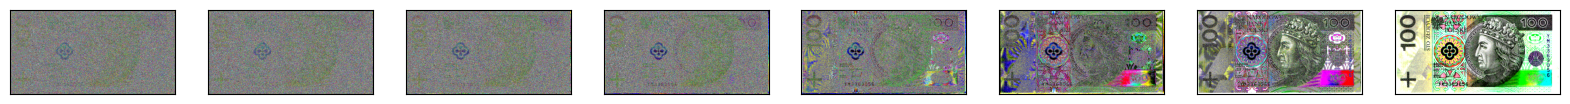

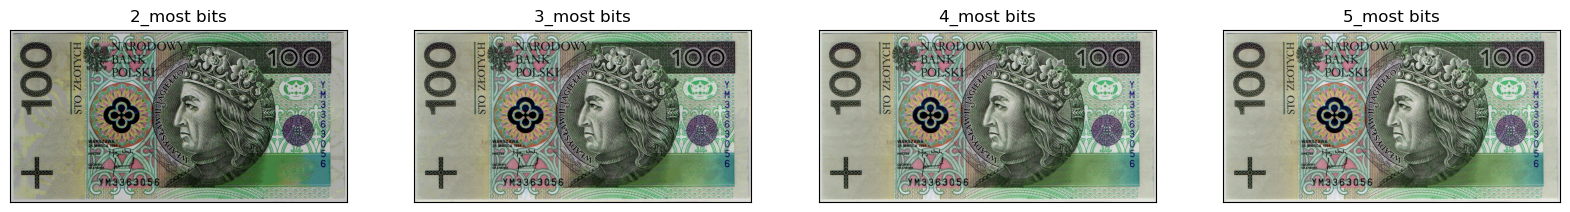

In [70]:
transformed_images_ = eight_diff_bitmaps(img_100)

reconstructed_image_2_most = transformed_images_[-1] + transformed_images_[-2]

reconstructed_image_3_most = transformed_images_[-1] + transformed_images_[-2] + transformed_images_[-3]

reconstructed_image_4_most = transformed_images_[-1] + transformed_images_[-2] + transformed_images_[-3] + transformed_images_[-4]

reconstructed_image_5_most = transformed_images_[-1] + transformed_images_[-2] + transformed_images_[-3] + transformed_images_[-4] + transformed_images_[-5]


f, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(reconstructed_image_2_most)
axs[0].set_title("2_most bits")
axs[0].set_xticks([]), axs[0].set_yticks([])
axs[1].imshow(reconstructed_image_3_most)
axs[1].set_title("3_most bits")
axs[1].set_xticks([]), axs[1].set_yticks([])
axs[2].imshow(reconstructed_image_4_most)
axs[2].set_title("4_most bits")
axs[2].set_xticks([]), axs[2].set_yticks([])
axs[3].imshow(reconstructed_image_5_most)
axs[3].set_title("5_most bits")
axs[3].set_xticks([]), axs[3].set_yticks([])
plt.show()



